<a href="https://colab.research.google.com/github/coader-128/Tensorflow/blob/ComputerVision_CNN/ComputerVision_CNN_005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf


In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-28 04:47:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   212MB/s    in 0.5s    

2023-09-28 04:47:54 (212 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#inspec the data

!ls pizza_steak/train/pizza

!ls

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [3]:
 # find the number of files in ths
import os
for dirpath , dirnames , filenames in os.walk("pizza_steak"):
  print(f"therey are {len(dirnames)} directories and {len(filenames)} images is {dirpath} ")

therey are 2 directories and 0 images is pizza_steak 
therey are 2 directories and 0 images is pizza_steak/test 
therey are 0 directories and 250 images is pizza_steak/test/steak 
therey are 0 directories and 250 images is pizza_steak/test/pizza 
therey are 2 directories and 0 images is pizza_steak/train 
therey are 0 directories and 750 images is pizza_steak/train/steak 
therey are 0 directories and 750 images is pizza_steak/train/pizza 


In [4]:
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_image_train

750

# Visualise our images

In [5]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted(item.name for item in data_dir.glob("*")))  # create a list of class name
class_names = class_names[:]
print(class_names)

['pizza' 'steak']


In [6]:
# lets visualise the images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random


def view_random_image(target_dir , target_class):
  # set up target directory
  target_folder = target_dir + target_class

  # get a random image

  random_image = random.sample(os.listdir(target_folder) , 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape :{img.shape}")
  return img





['2774899.jpg']
Image shape :(512, 512, 3)


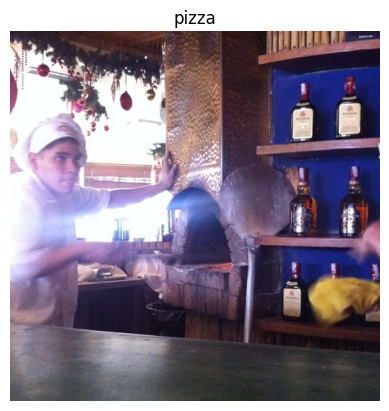

In [7]:
# view a random image from the training data

img = view_random_image(target_dir ="pizza_steak/train/" , target_class = "pizza" )

In [ ]:
#tf.constant(img)

In [ ]:
img.shape  # width , heigth , color

(512, 512, 3)

In [8]:
# get all the pixel value between 0 and 1

img/255.0

array([[[0.17647059, 0.12156863, 0.18039216],
        [0.14901961, 0.09411765, 0.15294118],
        [0.14901961, 0.10196078, 0.15686275],
        ...,
        [0.09803922, 0.09803922, 0.19215686],
        [0.10196078, 0.10196078, 0.20392157],
        [0.10196078, 0.10196078, 0.20392157]],

       [[0.18039216, 0.1254902 , 0.18431373],
        [0.16862745, 0.11372549, 0.17254902],
        [0.16470588, 0.11764706, 0.17254902],
        ...,
        [0.09411765, 0.09411765, 0.18823529],
        [0.09411765, 0.09411765, 0.19607843],
        [0.09019608, 0.09019608, 0.19215686]],

       [[0.16862745, 0.12156863, 0.16862745],
        [0.17647059, 0.12941176, 0.17647059],
        [0.17254902, 0.1254902 , 0.17254902],
        ...,
        [0.11764706, 0.10980392, 0.20392157],
        [0.11372549, 0.10196078, 0.20784314],
        [0.10980392, 0.09803922, 0.20392157]],

       ...,

       [[0.3372549 , 0.3372549 , 0.3372549 ],
        [0.34509804, 0.34509804, 0.34509804],
        [0.34117647, 0

In [9]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D , Dense , Flatten , MaxPool2D
import tensorflow as tf


tf.random.set_seed(43)

train_datagen = ImageDataGenerator(rescale  = 1./255)

valid_datagen = ImageDataGenerator(rescale  = 1./255)

train_dir ="/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory = train_dir , batch_size = 32,
                                               target_size = (224 , 224),
                                               class_mode = "binary" , seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir ,  batch_size = 32,
                                               target_size = (224 , 224),
                                               class_mode = "binary" , seed = 42)



model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (224 , 224 , 3) , name = "Inpug Layer"),
    Conv2D(filters = 10 , kernel_size = 3 , activation = "relu", name = "conv_1" ),
    Conv2D(10 , 3 , activation = "relu",name = "conv_2"),
    MaxPool2D(pool_size = 2 , padding = "valid" ,name = "MaxPool_1"),
    Conv2D(10 , 3 , activation = "relu" , name = "conv_3"),
    Conv2D(10 , 3 , activation = "relu",name = "conv_4"),
    MaxPool2D(pool_size = 2 ,name = "MaxPool_2"),
    Flatten(),
    Dense(1 , activation = "sigmoid" , name = "Dense_1")

])


model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data ,
                        epochs = 2 ,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/2
47/47 [==============================] - 23s 161ms/step - loss: 0.6883 - accuracy: 0.5947 - val_loss: 0.5014 - val_accuracy: 0.8240
Epoch 2/2
47/47 [==============================] - 6s 127ms/step - loss: 0.4737 - accuracy: 0.7873 - val_loss: 0.3700 - val_accuracy: 0.8640


<Axes: >

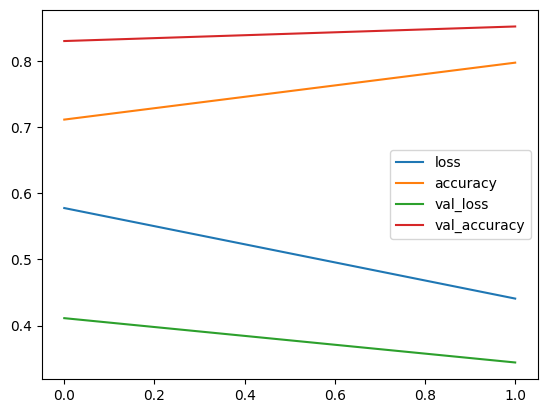

In [ ]:
pd.DataFrame(history_1.history).plot()

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv_2 (Conv2D)             (None, 220, 220, 10)      910       
                                                                 
 MaxPool_1 (MaxPooling2D)    (None, 110, 110, 10)      0         
                                                                 
 conv_3 (Conv2D)             (None, 108, 108, 10)      910       
                                                                 
 conv_4 (Conv2D)             (None, 106, 106, 10)      910       
                                                                 
 MaxPool_2 (MaxPooling2D)    (None, 53, 53, 10)        0         
                                                                 
 flatten (Flatten)           (None, 28090)             0

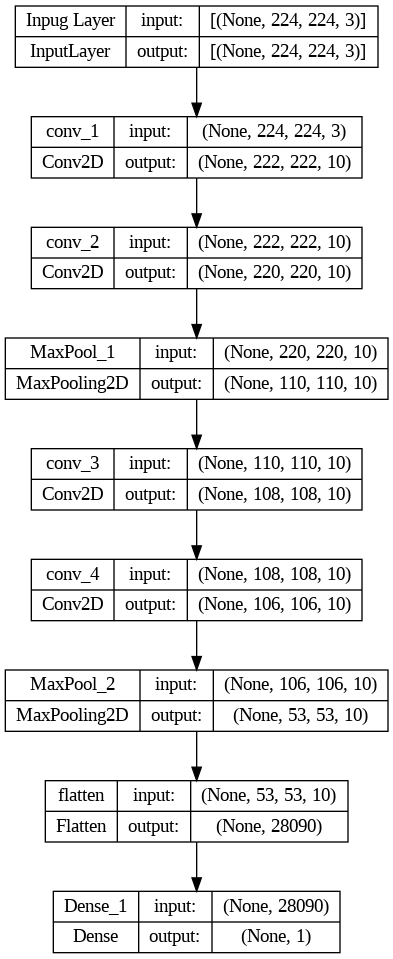

In [ ]:
tf.keras.utils.plot_model(model_1 , show_shapes = True)

In [ ]:
## using the same model but different dataset


tf.random.set_seed(43)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224 ,224 ,3)),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1 , activation  = "sigmoid")
])


model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data), validation_data = valid_data , validation_steps = len(valid_data) )



Epoch 1/5
47/47 [==============================] - 15s 254ms/step - loss: 0.7096 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
tf.random.set_seed(43)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224 ,224 , 3)),
    tf.keras.layers.Dense(100 , activation = "relu"),
    tf.keras.layers.Dense(100 , activation = "relu"),
    tf.keras.layers.Dense(100 , activation = "relu"),
    tf.keras.layers.Dense(1 , activation = "sigmoid")
])


model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data , epochs = 5 , steps_per_epoch=len(train_data) , validation_data = valid_data , validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 126ms/step - loss: 2.0365 - accuracy: 0.6113 - val_loss: 0.5166 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.5928 - accuracy: 0.7147 - val_loss: 0.6354 - val_accuracy: 0.6600
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.5888 - accuracy: 0.7400 - val_loss: 0.4467 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.8210 - accuracy: 0.6793 - val_loss: 0.6366 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4890 - accuracy: 0.7853 - val_loss: 0.4410 - val_accuracy: 0.8000


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification : Lets break it down

1. Become one with the data
2. Preprocess the data
3. Created a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameter and improve the model
7. Repeat until satisfied


# 1. Become one with data

['2287136.jpg']
Image shape :(512, 512, 3)
['403431.jpg']
Image shape :(512, 512, 3)


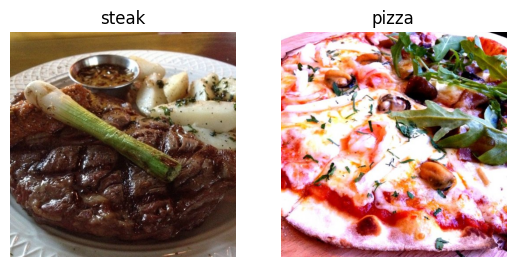

In [10]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/","pizza")

# 2. Preprocessing

In [11]:
#define directory

train_dir = "pizza_steak/train/"
valid_dir = "pizza_steak/test/"



# turn our data into batches
1. a batch is a small subset of data . rather than looking all 10000 data it took only 32
2. 10,000 image might not fit into memory of our processor
3. learning 10000 pattern in 1 go might make it bad


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(directory = train_dir , target_size = (224 , 224 ),color_mode = "rgb" , class_mode="binary" , batch_size = 32 , seed = 43 , )
test_data = train_datagen.flow_from_directory(directory = test_dir , target_size = (224 , 224 ),color_mode = "rgb" , class_mode="binary" , batch_size = 32 , seed = 43 , )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# get a sample from training data batch

images , labels = train_data.next() # get the nest batch of images and labels in train_data

len(images) , len(labels)

(32, 32)

In [14]:
# how many batches are there
len(train_data) # total pic/ batch size

47

In [15]:
# get the first tw images
images[:2] , images[0].shape

(array([[[[0.09803922, 0.12156864, 0.25490198],
          [0.13725491, 0.17254902, 0.3019608 ],
          [0.20392159, 0.24705884, 0.3647059 ],
          ...,
          [0.5176471 , 0.7725491 , 0.9921569 ],
          [0.52156866, 0.7686275 , 0.9803922 ],
          [0.5254902 , 0.76470596, 0.9803922 ]],
 
         [[0.1764706 , 0.23137257, 0.33333334],
          [0.4039216 , 0.4666667 , 0.5568628 ],
          [0.5686275 , 0.6313726 , 0.72156864],
          ...,
          [0.52156866, 0.77647066, 0.98823535],
          [0.5294118 , 0.77647066, 0.98823535],
          [0.53333336, 0.7725491 , 0.98823535]],
 
         [[0.5921569 , 0.6784314 , 0.7294118 ],
          [0.5686275 , 0.654902  , 0.7058824 ],
          [0.5764706 , 0.6627451 , 0.7176471 ],
          ...,
          [0.5176471 , 0.7803922 , 0.98823535],
          [0.53333336, 0.7803922 , 0.9921569 ],
          [0.53333336, 0.7803922 , 0.9921569 ]],
 
         ...,
 
         [[0.0509804 , 0.15294118, 0.15686275],
          [0.05098

In [16]:
labels

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

## 3. Create a cnn moddel (start with a base line model)

A base line is relatively simple model or existing result that yo set up when beginning a machine learning model experimentation , and then u try to beat that model

**note** in deep learning there is almost inf amt of architecture . So best way is start from simple and add complexity , and make trial and error.

In [ ]:
# making model

from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPool2D , Activation
tf.random.set_seed(43)


model_4 = tf.keras.Sequential([
    Conv2D(filters = 10 , kernel_size = 3, padding = "valid" , activation = "relu" , input_shape = (224,224 , 3)),
    Conv2D(filters = 10 , kernel_size = 3, padding = "valid" , activation = "relu" ),
    Conv2D(filters = 10 , kernel_size = 3, padding = "valid" , activation = "relu" ),
    Flatten(),

    Dense(1 , activation = "sigmoid")


])

model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


history_4 = model_4.fit(train_data , steps_per_epoch= len(train_data) , epochs = 5  ,validation_data= valid_data , validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 9s 142ms/step - loss: 1.6744 - accuracy: 0.6573 - val_loss: 0.5138 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 6s 135ms/step - loss: 0.4814 - accuracy: 0.7807 - val_loss: 0.4386 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4320 - accuracy: 0.8133 - val_loss: 0.4221 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3462 - accuracy: 0.8607 - val_loss: 0.3508 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.2512 - accuracy: 0.9120 - val_loss: 0.3412 - val_accuracy: 0.8540


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


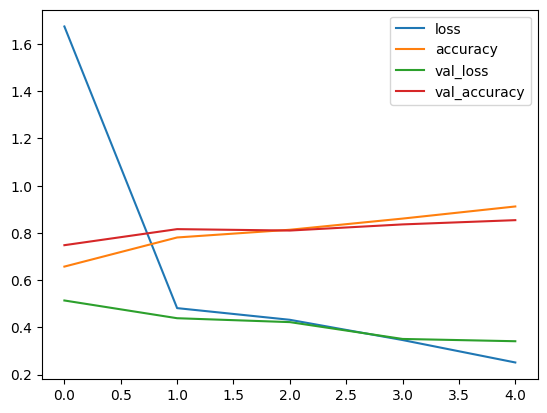

In [ ]:
pd.DataFrame(history_4.history).plot()
model_4.summary()

### 5. Evaluating our model

<Axes: >

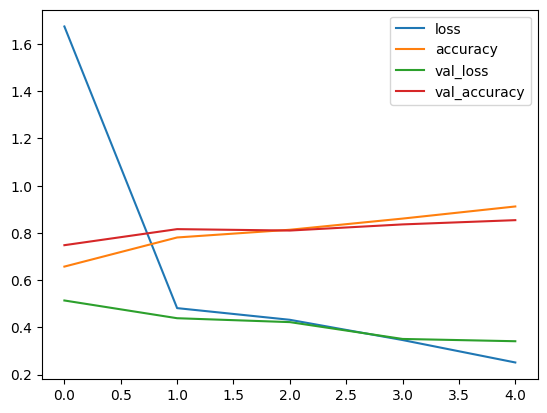

In [ ]:
pd.DataFrame(history_4.history).plot()

In [17]:
#plot the validation and traning curves separately

def plot_loss_curves(history):
  """
  return separate separate loss curves
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs , loss , label = "training loss")
  plt.plot(epochs , val_loss , label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()



  #plot accuracy
  plt.figure()
  plt.plot(epochs , accuracy , label = "training accuracy")
  plt.plot(epochs , val_accuracy , label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()



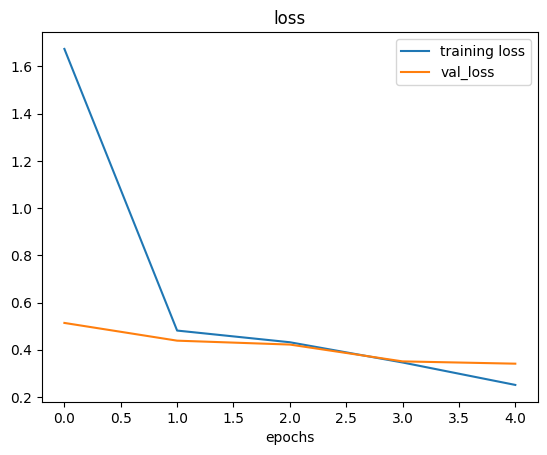

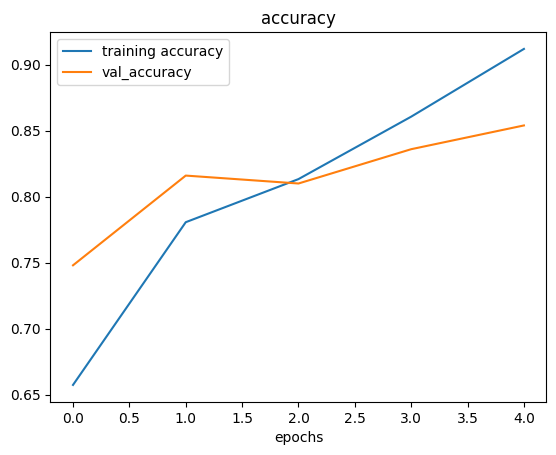

In [ ]:
plot_loss_curves(history_4)


# Why validation loss is increasing
1. since the model is over fitting


### 6. Adjust the hyper parameters

1. create the baseline
2. beat the base line by over fitting a larger model
3. Reduce over fitting

### ways to induce over fitting
1. Increase the number of conv layer
2. increase the numbef of conv layer
3. add another dense layer to the output of our flattened layer

### ways to reduce the overfittting
1. add data augmentation
2. Add regularization(max pooling layer)
3. add more data..


### Reducing the overfitting is called **regularization**


In [ ]:
# create the model(new base line)


tf.random.set_seed(43)


model_5 = tf.keras.Sequential([
    Conv2D(filters = 10 , kernel_size = 3, padding = "valid" , activation = "relu" , input_shape = (224,224 , 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 10 , kernel_size = 3, padding = "valid" , activation = "relu" ),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 10 , kernel_size = 3, padding = "valid" , activation = "relu" ),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 10 , kernel_size = 3, padding = "valid" , activation = "relu" ),
    MaxPool2D(pool_size = 2),
    Flatten(),

    Dense(1 , activation = "sigmoid")


])

model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


history_5 = model_5.fit(train_data , steps_per_epoch= len(train_data) , epochs = 5  ,validation_data= valid_data , validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 8s 117ms/step - loss: 0.6450 - accuracy: 0.6467 - val_loss: 0.4823 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4942 - accuracy: 0.7687 - val_loss: 0.4848 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4613 - accuracy: 0.7927 - val_loss: 0.3987 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4094 - accuracy: 0.8207 - val_loss: 0.3648 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.4136 - accuracy: 0.8167 - val_loss: 0.3342 - val_accuracy: 0.8640


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)       

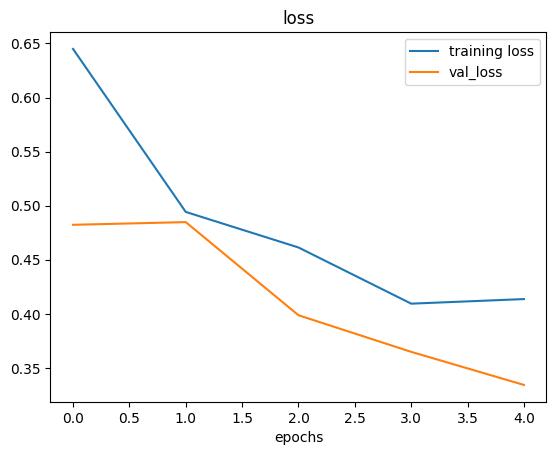

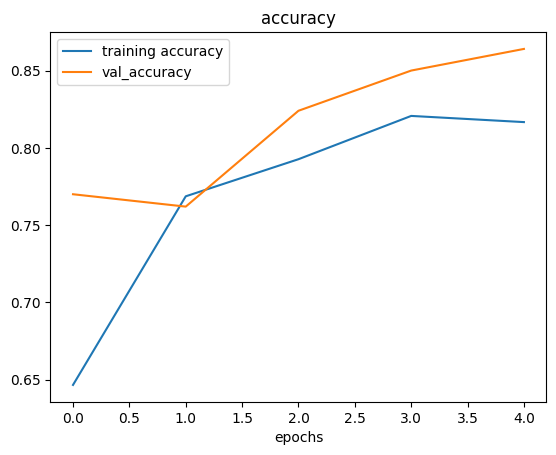

In [ ]:
plot_loss_curves(history_5)

## Data arugmentation

In [18]:
## create ImageGenerator training instance with data arugmentation


train_datagen_arugmented = ImageDataGenerator(rescale = 1/255.  ,
                                              rotation_range = 0.2, # amt of rotation
                                              shear_range = 0.2 , # how much shear u want
                                              zoom_range = 0.2, # zoom in randomly
                                              width_shift_range = 0.2 , # move image in x asix
                                              height_shift_range = 0.3,# move image in y axis
                                              horizontal_flip = True) # if u want horizontal flip

# create image data generator

train_datagen = ImageDataGenerator(rescale = 1/255.)

# create imagedatageneator with out argmentation for test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)





In [19]:
# import data and argment it from training dir

train_data_arugmented = train_datagen_arugmented.flow_from_directory(train_dir,
                                                                        target_size = (224,224),
                                                                        class_mode = "binary",
                                                                        color_mode = "rgb",
                                                                        shuffle = False,
                                                                        batch_size = 32)
# crete non argmented
train_data = train_datagen.flow_from_directory(train_dir,target_size = (224,224),class_mode = "binary", color_mode = "rgb",   shuffle = False,  batch_size = 32)


#creae non argmented test data

test_data = test_datagen.flow_from_directory(test_dir,target_size = (224,224),class_mode = "binary", color_mode = "rgb",   shuffle = False,  batch_size = 32)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## data argmentation is done only on training data

# New Section

In [20]:
# get sample

images , labels = train_data.next()
argmented_images , argmented_labels = train_data_arugmented.next()

showing image number :  {5}


(-0.5, 223.5, 223.5, -0.5)

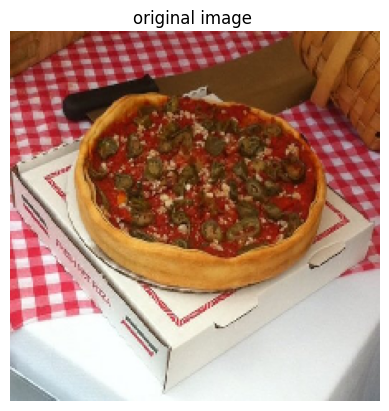

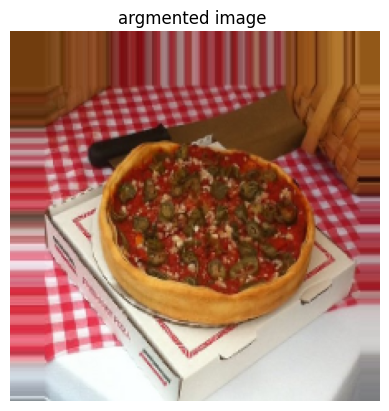

In [21]:
# show original and armented\

import random

random_num = random.randint(0,10)
print(f"showing image number : ",{random_num})
plt.imshow(images[random_num])
plt.title("original image ")
plt.axis(False)
plt.figure()
plt.imshow(argmented_images[random_num])
plt.title("argmented image ")
plt.axis(False)


# Now lets see how our model function on argmented data

In [ ]:
model_6 = tf.keras.Sequential([
    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10 , 3  , activation = "relu"),
    MaxPool2D(),
    Conv2D(10 , 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1 , activation = "sigmoid")
])


model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_arugmented , epochs = 5,
                        steps_per_epoch = len(train_data_arugmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))



Epoch 1/5
47/47 [==============================] - 24s 474ms/step - loss: 0.6656 - accuracy: 0.5867 - val_loss: 0.6084 - val_accuracy: 0.6080
Epoch 2/5
47/47 [==============================] - 20s 435ms/step - loss: 0.5685 - accuracy: 0.7120 - val_loss: 0.4836 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5606 - accuracy: 0.7193 - val_loss: 0.4267 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 20s 427ms/step - loss: 0.5057 - accuracy: 0.7720 - val_loss: 0.5249 - val_accuracy: 0.7240
Epoch 5/5
47/47 [==============================] - 22s 454ms/step - loss: 0.5088 - accuracy: 0.7473 - val_loss: 0.4217 - val_accuracy: 0.8240


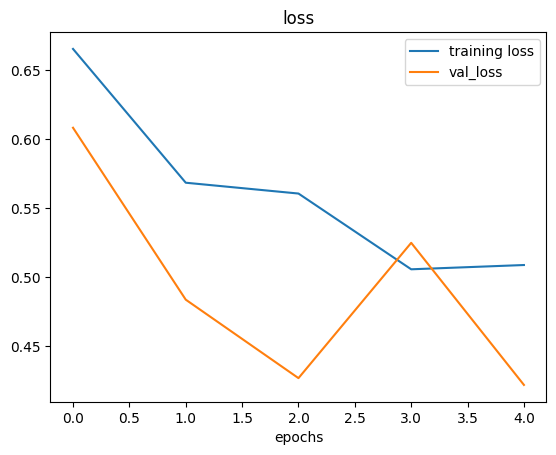

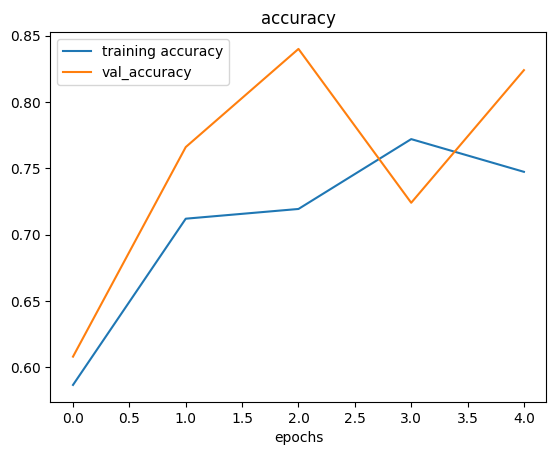

In [ ]:
# check our model trainibg cureve

plot_loss_curves(history_6)

In [22]:
# import data and argment it from training dir

train_data_arugmented_shuffeled = train_datagen_arugmented.flow_from_directory(train_dir,
                                                                        target_size = (224,224),
                                                                        class_mode = "binary",
                                                                        color_mode = "rgb",
                                                                        shuffle = True,
                                                                        batch_size = 32)
# crete non argmented
train_data = train_datagen.flow_from_directory(train_dir,target_size = (224,224),class_mode = "binary", color_mode = "rgb",   shuffle = False,  batch_size = 32)


#creae non argmented test data

test_data = test_datagen.flow_from_directory(test_dir,target_size = (224,224),class_mode = "binary", color_mode = "rgb",   shuffle = False,  batch_size = 32)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
model_7 = tf.keras.Sequential([
    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10 , 3  , activation = "relu"),
    MaxPool2D(),
    Conv2D(10 , 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1 , activation = "sigmoid")
])


model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_7 = model_7.fit(train_data_arugmented_shuffeled , epochs = 5,
                        steps_per_epoch = len(train_data_arugmented_shuffeled),
                        validation_data = test_data,
                        validation_steps = len(test_data))



Epoch 1/5
47/47 [==============================] - 26s 503ms/step - loss: 0.6902 - accuracy: 0.5667 - val_loss: 0.6352 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 26s 565ms/step - loss: 0.5935 - accuracy: 0.6900 - val_loss: 0.4544 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 23s 482ms/step - loss: 0.5301 - accuracy: 0.7493 - val_loss: 0.3952 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5071 - accuracy: 0.7640 - val_loss: 0.4595 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 23s 487ms/step - loss: 0.5046 - accuracy: 0.7593 - val_loss: 0.3584 - val_accuracy: 0.8520


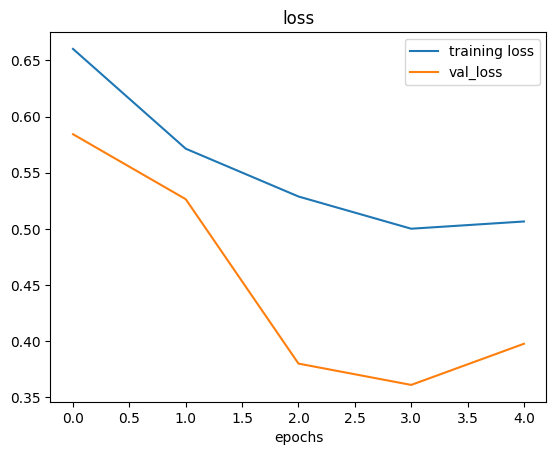

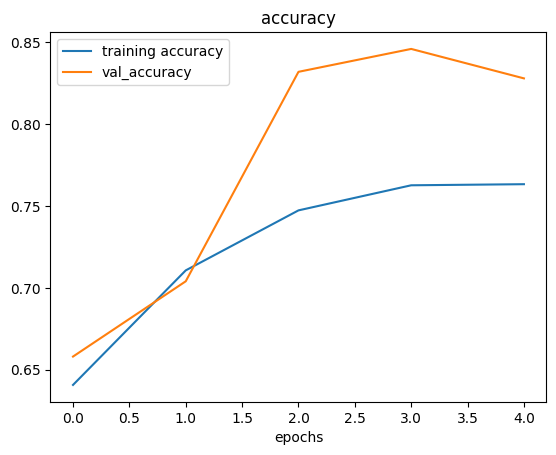

In [ ]:
# check our model trainibg cureve

plot_loss_curves(history_7)

## Shuffling is important always turn it to true

### repeat until satisfied

### we have already beaten our base line . we need to do some few more things
 1. increase the number of filters(32 , 64 , 10)
 2. increase the numbet of filters
 3. train longer
 4. Find ideal learning rate
 5. Get more data
 6. use **transfer learning**  




### Making a prediction with our trained model on custom data

In [24]:
print(class_names)

['pizza' 'steak']


(-0.5, 1279.5, 848.5, -0.5)

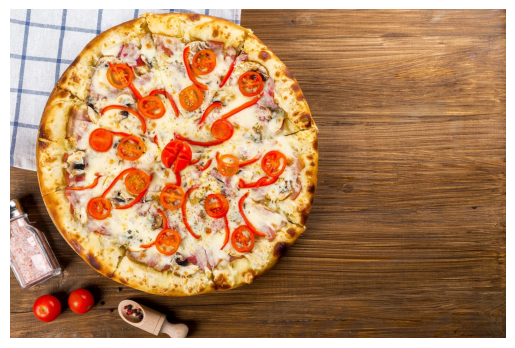

In [26]:
import matplotlib.image as mpimg
img = mpimg.imread("/content/pizza2.jpg")
plt.imshow (img)
plt.axis("off")

In [27]:
img.shape

(849, 1280, 3)

In [28]:
imgs = tf.image.resize(
    img,
    (224,224),

    preserve_aspect_ratio=False,
    antialias=False,
    name=None
)
imgs = imgs/255.
#imgs.shape, imgs

In [29]:
pred = model_7.predict(tf.expand_dims(imgs  , axis = 0))

1/1 [==============================] - 0s 181ms/step


In [ ]:
pred

In [30]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [41]:
# we can idex the predicted class by rounding it off

def pred_plot(model ,filename , class_names = class_names):
  """import an image and plot both
    model - enter th emodel name
    filename = " location of the file
  """


  #imprt image and preprocessin
  img = mpimg.imread(filename)
  imgs = tf.image.resize(  img , (224 , 224))
  imgs = imgs/255.
  pred = model.predict(tf.expand_dims(imgs  , axis = 0))
  pred_class = class_names[int(tf.round(pred))]


  #plot image
  plt.imshow(img)
  plt.title("Prediction : {}".format(pred_class))
  plt.axis("off")


1/1 [==============================] - 0s 28ms/step


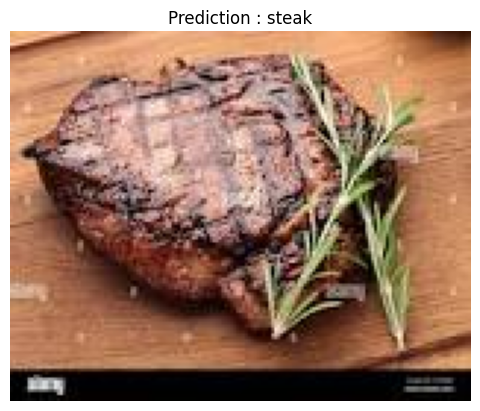

In [46]:
pred_plot(model_7 ,"/content/download.jpeg" )

## Multiclass Image Classification

In [49]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-09-28 05:04:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.251.2.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   236MB/s    in 2.1s    

2023-09-28 05:04:29 (236 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [50]:
import zipfile


#unzip our data

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip" , "r")
zip_ref.extractall()
zip_ref.close()

In [51]:
import os

# walk through all 10 classes in image data

for dirpath , dirnames , filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 10 directories and 0 images in 10_fo

In [52]:
# ste up train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"



In [54]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2990769.jpg']
Image shape :(512, 512, 3)


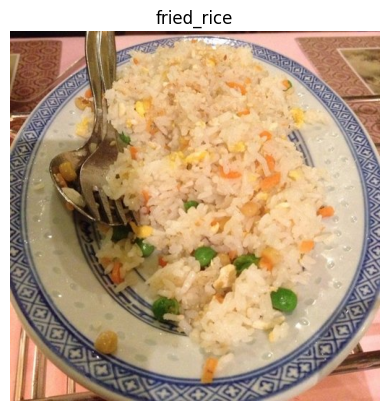

In [59]:
# visualise

import random
img = view_random_image(train_dir , target_class = random.choice(class_names))


### Preprocess the data

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


# load data in form directories into batches

train_data = train_datagen.flow_from_directory(train_dir ,
                                               target_size = (224 ,224),
                                               batch_size = 32 ,
                                               class_mode = "categorical",
                                               color_mode = "rgb",
                                               shuffle = "True")


test_data = test_datagen.flow_from_directory(test_dir ,
                                               target_size = (224 ,224),
                                               batch_size = 32 ,
                                               class_mode = "categorical",
                                               color_mode = "rgb")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
### Ceate the model

In [72]:
tf.random.set_seed(43)

model_8  = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (224,224,3)),
    Conv2D(10 , 3 , activation = "relu"),

    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(pool_size = 2),

    Conv2D(10 , 3 , activation = "relu"),

    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(pool_size = 2),


    Flatten(),

    Dense(10 , activation = "softmax")

])


model_8.compile(loss = "categorical_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


history_8 = model_8.fit(train_data ,
                        steps_per_epoch = len(train_data),
                        validation_data  = test_data,
                        epochs = 5,
                        validation_steps = (0.25*len(test_data)) # only use 25% of test data
                        )

Epoch 1/5
235/235 [==============================] - 27s 105ms/step - loss: 2.1679 - accuracy: 0.1948 - val_loss: 2.0449 - val_accuracy: 0.2594
Epoch 2/5
235/235 [==============================] - 26s 109ms/step - loss: 1.9567 - accuracy: 0.3117 - val_loss: 1.9079 - val_accuracy: 0.3281
Epoch 3/5
235/235 [==============================] - 25s 107ms/step - loss: 1.6135 - accuracy: 0.4537 - val_loss: 1.9363 - val_accuracy: 0.3547
Epoch 4/5
235/235 [==============================] - 25s 107ms/step - loss: 0.9643 - accuracy: 0.6835 - val_loss: 2.3232 - val_accuracy: 0.3297
Epoch 5/5
235/235 [==============================] - 26s 113ms/step - loss: 0.3780 - accuracy: 0.8847 - val_loss: 3.1396 - val_accuracy: 0.2781


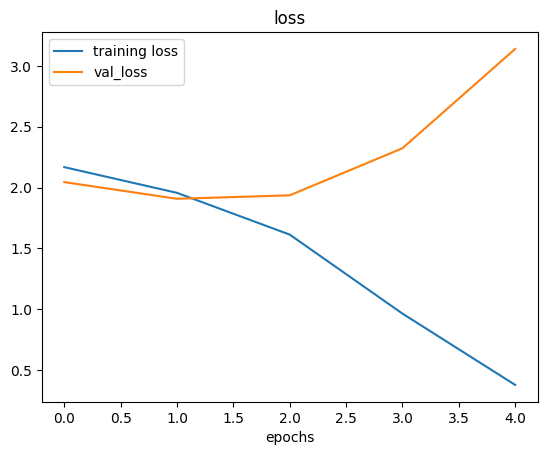

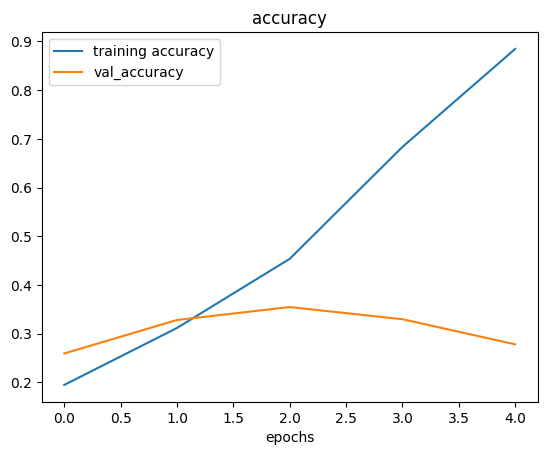

In [73]:
plot_loss_curves(history_8)

## Evaluate the model

In [75]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 3.2086 - accuracy: 0.2872


[3.208566665649414, 0.287200003862381]

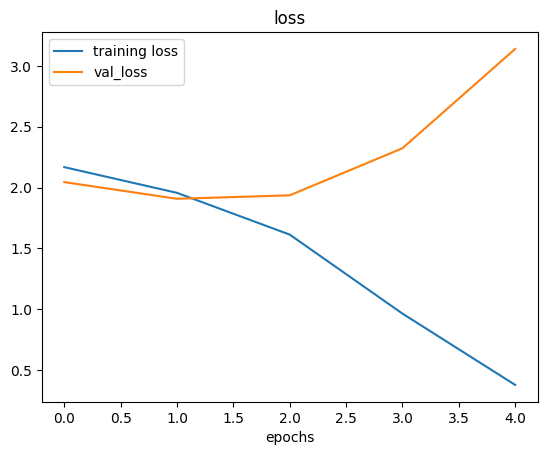

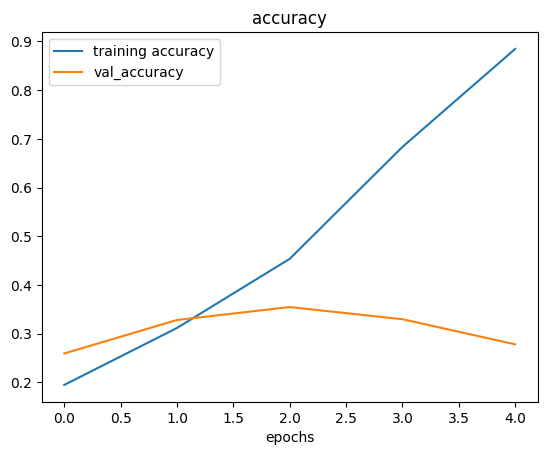

In [76]:
plot_loss_curves(history_8)

## what do these cuerve tel us

well its seems  its **overfitting** the training data , In other words its learnong training data so well that its unable to generalise.

## we need to beat the base line

  1. simplefy the model,
  2. use data argmenation
  3. make he dense layer better
  4. use trainsfer learning

In [77]:
tf.random.set_seed(43)

model_9  = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (224,224,3)),
    Conv2D(10 , 3 , activation = "relu"),

    MaxPool2D(pool_size = 2),

    Conv2D(10 , 3 , activation = "relu"),

    MaxPool2D(pool_size = 2),


    Flatten(),

    Dense(10 , activation = "softmax")

])


model_9.compile(loss = "categorical_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


history_9 = model_9.fit(train_data ,
                        steps_per_epoch = len(train_data),
                        validation_data  = test_data,
                        epochs = 5,
                        validation_steps = (len(test_data)) # only use 25% of test data
                        )

Epoch 1/5
235/235 [==============================] - 31s 127ms/step - loss: 2.1851 - accuracy: 0.2243 - val_loss: 1.9725 - val_accuracy: 0.2972
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 1.7733 - accuracy: 0.3943 - val_loss: 1.8789 - val_accuracy: 0.3460
Epoch 3/5
235/235 [==============================] - 33s 141ms/step - loss: 1.4047 - accuracy: 0.5439 - val_loss: 1.9658 - val_accuracy: 0.3396
Epoch 4/5
235/235 [==============================] - 27s 117ms/step - loss: 0.8938 - accuracy: 0.7245 - val_loss: 2.1998 - val_accuracy: 0.3264
Epoch 5/5
235/235 [==============================] - 28s 119ms/step - loss: 0.4700 - accuracy: 0.8728 - val_loss: 2.6826 - val_accuracy: 0.2968


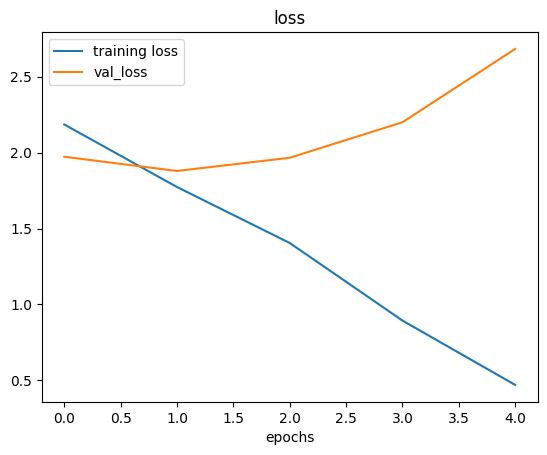

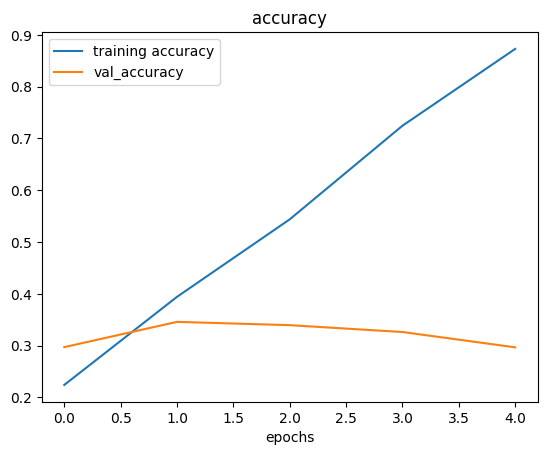

In [79]:
plot_loss_curves(history_9)

In [80]:
model_9.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 29160)             0         
                                                                 
 dense_6 (Dense)             (None, 10)               

## Looks like simplifying th emode went down , lets try data argmentation


In [84]:
train_datagen_argmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2 ,
                                             width_shift_range = 0.2,
                                             shear_range = 0.3,
                                             zoom_range = 0.3,
                                             horizontal_flip = True,
                                             height_shift_range = 0.2)

train_data_arugmented = train_datagen_argmented.flow_from_directory(train_dir,
                                                                    class_mode = "categorical",
                                                                    color_mode = "rgb",
                                                                    target_size = (224,224))



Found 7500 images belonging to 10 classes.


###Creating model 10 but based on cloning of model 8

In [87]:
model_10 = tf.keras.models.clone_model(model_8)

# compile the model

model_10.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

model_10.summary()

history_10 = model_10.fit(train_data_arugmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_arugmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

235/235 [==============================] - 120s 501ms/step - loss: 2.1699 - accuracy: 0.2053 - val_loss: 1.9516 - val_accuracy: 0.3128
Epoch 2/5
235/235 [==============================] - 117s 500ms/step - loss: 2.0408 - accuracy: 0.2815 - val_loss: 1.9010 - val_accuracy: 0.3540
Epoch 3/5
235/235 [==============================] - 113s 480ms/step - loss: 1.9834 - accuracy: 0.3077 - val_loss: 1.7844 - val_accuracy: 0.3692
Epoch 4/5
235/235 [==============================] - 110s 469ms/step - loss: 1.9526 - accuracy: 0.3161 - val_loss: 1.7509 - val_accuracy: 0.4084
Epoch 5/5
235/235 [==============================] - 111s 473ms/step - loss: 1.8939 - accuracy: 0.3449 - val_loss: 1.7258 - val_accuracy: 0.4056


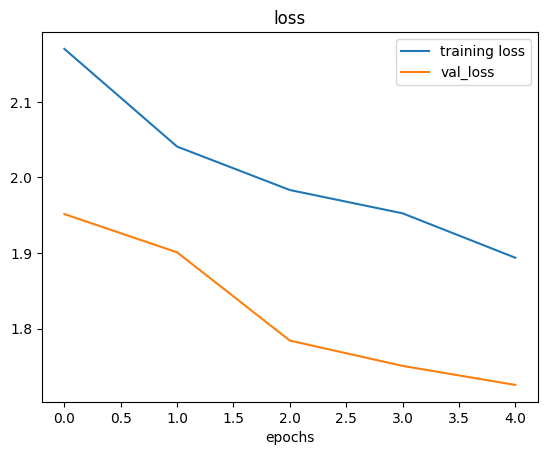

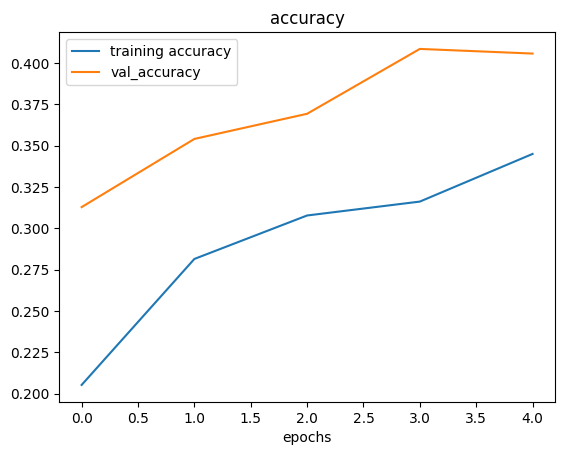

In [88]:
plot_loss_curves(history_10)

In [89]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 92ms/step - loss: 1.7258 - accuracy: 0.4056


[1.7257707118988037, 0.40560001134872437]

1/1 [==============================] - 0s 31ms/step
steak


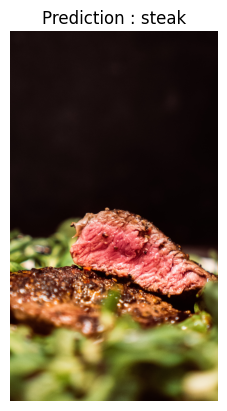

In [121]:
# we can idex the predicted class by rounding it off

def pred_plot(model ,filename , class_names = class_names):
  """import an image and plot both
    model - enter th emodel name
    filename = " location of the file
  """
  #imprt image and preprocessin
  img = mpimg.imread(filename)
  imgs = tf.image.resize(  img , (224 , 224))
  imgs = imgs/255.

  pred = model.predict(tf.expand_dims(imgs  , axis = 0))
  pred = tf.squeeze(pred)

  pred_class = class_names[tf.argmax(pred)]
  print(pred_class)



  #plot image
  plt.imshow(img)
  plt.title("Prediction : {}".format(pred_class))
  plt.axis("off")

pred_plot(model_10 , "/content/download.jpg",class_names = class_names)

In [112]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [107]:
z = tf.constant([1,2,3,4], dtype = tf.int8)
y = tf.reduce_max(z)
y.numpy()

4

## Saving our model


In [122]:
model_10.save("saved_trained_model_10")

In [123]:
loaded_model = tf.keras.models.load_model("saved_trained_model_10")
loaded_model.evaluate(test_data)

79/79 [==============================] - 8s 95ms/step - loss: 1.7258 - accuracy: 0.4056


[1.725770354270935, 0.40560001134872437]